**Dataset Number**

In [79]:
ID=1080
dataset_no=((1 + 0 + 8 + 0) % 5) + 1
print(dataset_no)

5


In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
#ford_car = pd.read_csv("/content/Ford Car Price Prediction.csv")

In [83]:
#ford_car_price = pd.read_excel("/content/drive/MyDrive/5/Ford Car Price Prediction.xlsx")
ford_car = pd.read_csv("/content/drive/MyDrive/5/Ford Car Price Prediction.csv")
#with open("/content/drive/MyDrive/5/Description FCP.txt", 'r', encoding='utf-8') as file:
#    content = file.read()
#    print(content)
ford_car.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,NaN,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,NaN,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,NaN,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,NaN,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,NaN,48.7,1.0


In [84]:
ford_car.shape

(17966, 9)

# **Removing null values**

### *Option 1: Removing the column*

In [85]:
ford_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17957 non-null  float64
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 1.2+ MB


In [86]:
ford_car.isnull()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...
17961,False,False,False,False,False,False,False,False,False
17962,False,False,False,False,False,False,False,False,False
17963,False,False,False,False,False,False,False,False,False
17964,False,False,False,False,False,False,False,False,False


In [87]:
ford_car.isnull().sum()

,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,9
mpg,0
engineSize,0


In [88]:
new_ford_car = ford_car.drop(['tax'], axis=1)

In [89]:
new_ford_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   mpg           17966 non-null  float64
 7   engineSize    17966 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 1.1+ MB


In [90]:
new_ford_car.head()

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,48.7,1.0


### *Option 2: Without dropping the entire column, remove the rows with null values, as there are only 9 null entries*

In [91]:
new_ford_car2 = ford_car.dropna(subset=['tax'])
print(new_ford_car2)

           model  year  price transmission  mileage fuelType    tax   mpg  \
9          Focus  2018  10000       Manual    48141   Petrol  145.0  61.4   
10        Fiesta  2018  11561       Manual    18803   Petrol  145.0  56.5   
11      EcoSport  2018  13500       Manual    12065   Petrol  145.0  54.3   
12        Fiesta  2017  11000       Manual    20978   Petrol    0.0  65.7   
13          Kuga  2018  17999    Semi-Auto     9002   Diesel  145.0  54.3   
...          ...   ...    ...          ...      ...      ...    ...   ...   
17961      B-MAX  2017   8999       Manual    16700   Petrol  150.0  47.1   
17962      B-MAX  2014   7499       Manual    40700   Petrol   30.0  57.7   
17963      Focus  2015   9999       Manual     7010   Diesel   20.0  67.3   
17964         KA  2018   8299       Manual     5007   Petrol  145.0  57.7   
17965      Focus  2015   8299       Manual     5007   Petrol   22.0  57.7   

       engineSize  
9             1.0  
10            1.0  
11            1

In [92]:
new_ford_car2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17957 entries, 9 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17957 non-null  object 
 1   year          17957 non-null  int64  
 2   price         17957 non-null  int64  
 3   transmission  17957 non-null  object 
 4   mileage       17957 non-null  int64  
 5   fuelType      17957 non-null  object 
 6   tax           17957 non-null  float64
 7   mpg           17957 non-null  float64
 8   engineSize    17957 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 1.4+ MB


In [93]:
new_ford_car2.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
9,Focus,2018,10000,Manual,48141,Petrol,145.0,61.4,1.0
10,Fiesta,2018,11561,Manual,18803,Petrol,145.0,56.5,1.0
11,EcoSport,2018,13500,Manual,12065,Petrol,145.0,54.3,1.0
12,Fiesta,2017,11000,Manual,20978,Petrol,0.0,65.7,1.0
13,Kuga,2018,17999,Semi-Auto,9002,Diesel,145.0,54.3,2.0


In [94]:
new_ford_car.shape

(17966, 8)

In [95]:
new_ford_car2.shape

(17957, 9)

# **Removing duplicate rows (if present)**

In [96]:
print("Duplicates before removal:", new_ford_car.duplicated().sum())

Duplicates before removal: 176


In [97]:
new_ford_car_cleaned = new_ford_car.drop_duplicates()
print("Duplicates after removal:", new_ford_car_cleaned.duplicated().sum())

Duplicates after removal: 0


In [98]:
print(new_ford_car_cleaned)

         model  year  price transmission  mileage fuelType   mpg  engineSize
0       Fiesta  2017  12000    Automatic    15944   Petrol  57.7         1.0
1        Focus  2018  14000       Manual     9083   Petrol  57.7         1.0
2        Focus  2017  13000       Manual    12456   Petrol  57.7         1.0
3       Fiesta  2019  17500       Manual    10460   Petrol  40.3         1.5
4       Fiesta  2019  16500    Automatic     1482   Petrol  48.7         1.0
...        ...   ...    ...          ...      ...      ...   ...         ...
17961    B-MAX  2017   8999       Manual    16700   Petrol  47.1         1.4
17962    B-MAX  2014   7499       Manual    40700   Petrol  57.7         1.0
17963    Focus  2015   9999       Manual     7010   Diesel  67.3         1.6
17964       KA  2018   8299       Manual     5007   Petrol  57.7         1.2
17965    Focus  2015   8299       Manual     5007   Petrol  57.7         1.0

[17790 rows x 8 columns]


# **Handling categorical variables**

### Option 1: Nominal (No Ranking)


`
One hot encoding
`



In [99]:
new_ford_car_cleaned['model'].unique()

array([' Fiesta', ' Focus', ' Puma', ' Kuga', ' EcoSport', ' C-MAX',
       ' Mondeo', ' Ka+', ' Tourneo Custom', ' S-MAX', ' B-MAX', ' Edge',
       ' Tourneo Connect', ' Grand C-MAX', ' KA', ' Galaxy', ' Mustang',
       ' Grand Tourneo Connect', ' Fusion', ' Ranger', ' Streetka',
       ' Escort', ' Transit Tourneo', 'Focus'], dtype=object)

In [100]:
new_ford_car_cleaned['transmission'].unique()

array(['Automatic', 'Manual', 'Semi-Auto'], dtype=object)

In [101]:
new_ford_car_cleaned['fuelType'].unique()

array(['Petrol', 'Diesel', 'Hybrid', 'Electric', 'Other'], dtype=object)

In [102]:
new_ford_car_enc = pd.get_dummies(new_ford_car_cleaned, columns=['model', 'transmission', 'fuelType'], drop_first=True)
new_ford_car_enc.head()

,year,price,mileage,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,model_ Fiesta,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,12000,15944,57.7,1.0,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
1,2018,14000,9083,57.7,1.0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,2017,13000,12456,57.7,1.0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,2019,17500,10460,40.3,1.5,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,True
4,2019,16500,1482,48.7,1.0,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True


In [103]:
new_ford_car_enc.shape

(17790, 34)

### Option 2: Ordinal (Ranking)

In [104]:
pass

# **Feature scaling**

### 1) Preparing data for a machine learning model by scaling features and evaluating model performance

In [105]:
numericFeatures = ['year', 'price', 'mileage', 'mpg', 'engineSize']
scaler = MinMaxScaler()
new_ford_car_enc[numericFeatures] = scaler.fit_transform(new_ford_car_enc[numericFeatures])

### 2) Preparing data for a machine learning model by scaling features and evaluating model performance

**Split data into features (X) and target (y)**

In [106]:
X = new_ford_car_enc.drop('price', axis=1)
y = new_ford_car_enc['price']

**Split the data into training and testing sets**

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)

(13342, 33)
(4448, 33)


**MinMaxScaler**

In [108]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Initialize the KNN regressor and fit the model**

In [109]:
knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)
print("KNN test accuracy (scaled data): {:.2f}".format(knn.score(X_test_scaled, y_test)))

KNN test accuracy (scaled data): 0.91


In [110]:
print("Per-feature minimum before scaling:\n", X_train.min(axis=0))
print("\nPer-feature maximum before scaling:\n", X_train.max(axis=0))

Per-feature minimum before scaling:
 year                              0.0
mileage                           0.0
mpg                               0.0
engineSize                        0.0
model_ C-MAX                    False
model_ EcoSport                 False
model_ Edge                     False
model_ Escort                   False
model_ Fiesta                   False
model_ Focus                    False
model_ Fusion                   False
model_ Galaxy                   False
model_ Grand C-MAX              False
model_ Grand Tourneo Connect    False
model_ KA                       False
model_ Ka+                      False
model_ Kuga                     False
model_ Mondeo                   False
model_ Mustang                  False
model_ Puma                     False
model_ Ranger                   False
model_ S-MAX                    False
model_ Streetka                 False
model_ Tourneo Connect          False
model_ Tourneo Custom           False
model_ Transi

In [111]:
print("Per-feature minimum after scaling:\n", X_train_scaled.min(axis=0))
print("\nPer-feature maximum after scaling:\n", X_train_scaled.max(axis=0))

Per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1.]


# **Removing 1-2 variables using correlation as feature selection**

In [112]:
numericFeatures = ['year', 'price', 'mileage', 'mpg', 'engineSize']
corr_matrix = new_ford_car_enc[numericFeatures].corr()
print(corr_matrix)

                year     price   mileage       mpg  engineSize
year        1.000000  0.635845 -0.709236 -0.021329   -0.137383
price       0.635845  1.000000 -0.530883 -0.345896    0.411517
mileage    -0.709236 -0.530883  1.000000  0.117858    0.214234
mpg        -0.021329 -0.345896  0.117858  1.000000   -0.262199
engineSize -0.137383  0.411517  0.214234 -0.262199    1.000000


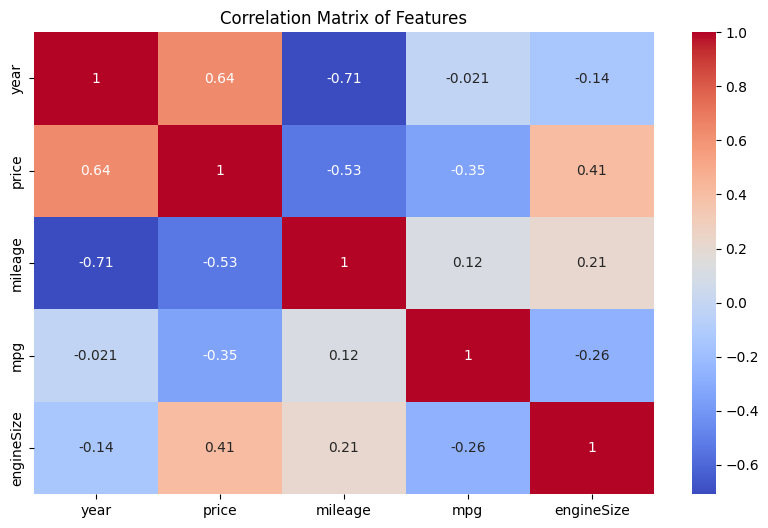

In [113]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

In [114]:
threshold = 0.7
high_corr_pairs = np.where(np.abs(corr_matrix) > threshold)
high_corr_pairs = [(numericFeatures[i], numericFeatures[j]) for i, j in zip(*high_corr_pairs) if i != j and i < j]

print("Highly correlated features (correlation > 0.7):", high_corr_pairs)

Highly correlated features (correlation > 0.7): [('year', 'mileage')]


In [115]:
new_ford_car_enc_dropped = new_ford_car_enc.drop(columns=['mileage'])
print(new_ford_car_enc_dropped.head())

#new_ford_car_enc_dropped = new_ford_car_enc.drop(columns=['year'])
#print(new_ford_car_enc_dropped.head())

       year     price       mpg  engineSize  model_ C-MAX  model_ EcoSport  \
0  0.328125  0.211101  0.203867         0.2         False            False   
1  0.343750  0.247798  0.203867         0.2         False            False   
2  0.328125  0.229450  0.203867         0.2         False            False   
3  0.359375  0.312018  0.107735         0.3         False            False   
4  0.359375  0.293670  0.154144         0.2         False            False   

   model_ Edge  model_ Escort  model_ Fiesta  model_ Focus  ...  \
0        False          False           True         False  ...   
1        False          False          False          True  ...   
2        False          False          False          True  ...   
3        False          False           True         False  ...   
4        False          False           True         False  ...   

   model_ Tourneo Connect  model_ Tourneo Custom  model_ Transit Tourneo  \
0                   False                  False    

# **Write the resulting DataFrame to a CSV file**

In [ ]:
new_ford_car_enc_dropped.to_csv('CSE422_10_Lab_Assignment04_Summer2024.csv', index=False)
print("Data has been written to CSE422_10_Lab_Assignment04_Summer2024.csv")